#Audio Transcription of Youtube videos with Offensive words


Install relevant packages which would be used for video and audio extraction

In [ ]:
!pip install pytube moviepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.6 MB/s eta 0:00:00


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

 Extract video from the Youtube link

In [ ]:
from pytube import YouTube

def download_video(youtube_url, output_path='downloaded_video'):
    try:
        # Create a YouTube object
        yt = YouTube(youtube_url)

        # Get the highest resolution stream available
        video_stream = yt.streams.get_highest_resolution()

        # Download the video
        video_stream.download(output_path)

        print(f"Video downloaded successfully to: {output_path}")

    except Exception as e:
        print(f"Error: {e}")

video_links = ['https://www.youtube.com/watch?v=K7zV20giLY0','https://www.youtube.com/watch?v=ydivkbp1D5E', 'https://www.youtube.com/watch?v=Qf3RFZjQ9v4', 'https://www.youtube.com/watch?v=Akwm2UZJ34o']

# Replace 'your_youtube_link' with the actual YouTube video link
for video_url in video_links:
  download_video(video_url)

Video downloaded successfully to: downloaded_video
Video downloaded successfully to: downloaded_video
Video downloaded successfully to: downloaded_video
Video downloaded successfully to: downloaded_video


Extract audio from the downloaded video

In [ ]:
from moviepy.video.io.VideoFileClip import VideoFileClip
import os

def extract_audio(video_path, video_name):
    try:
        # Load the video clip
        video_clip = VideoFileClip(video_path)

        # Extract the audio
        audio_clip = video_clip.audio
        output_audio_path = video_name.replace('.mp4', '')+'.wav'
        # Save the extracted audio
        audio_clip.write_audiofile(output_audio_path)

        print(f"Audio extracted successfully to: {output_audio_path}")

    except Exception as e:
        print(f"Error: {e}")

# Replace 'your_video.mp4' with the actual path to your MP4 video
video_path = os.listdir(os.path.join('/content', 'downloaded_video'))
for video in video_path:
  video_path = os.path.join('/content', 'downloaded_video', video)
  extract_audio(video_path, video_name = video)

MoviePy - Writing audio in Toddlers With Potty Mouths.wav


MoviePy - Done.
Audio extracted successfully to: Toddlers With Potty Mouths.wav
MoviePy - Writing audio in Mom gives kids permission to say one swear word each she is SHOCKED by the results.wav


MoviePy - Done.
Audio extracted successfully to: Mom gives kids permission to say one swear word each she is SHOCKED by the results.wav
MoviePy - Writing audio in Angry Little Kid Yells at Teacher to “Shut the Fck Up” at Pre-School Graduation.wav


MoviePy - Done.
Audio extracted successfully to: Angry Little Kid Yells at Teacher to “Shut the Fck Up” at Pre-School Graduation.wav
MoviePy - Writing audio in Hot Food  POEM  The Hypnotiser  Kids Poems and Stories With Michael Rosen.wav


MoviePy - Done.
Audio extracted successfully to: Hot Food  POEM  The Hypnotiser  Kids Poems and Stories With Michael Rosen.wav


In [ ]:
#Move all the audio files to a single directory
import os
import shutil

def create_directory(directory_path):
    try:
        # Check if the directory already exists
        if not os.path.exists(directory_path):
            # If not, create the directory
            os.makedirs(directory_path)
            print(f"Directory created: {directory_path}")
        else:
            print(f"Directory already exists: {directory_path}")
    except Exception as e:
        print(f"Error creating directory: {e}")

# Replace 'your_directory' with the desired directory path
directory_path = '/content/extracted_audios'
create_directory(directory_path)



def move_wav_files(source_directory, destination_directory):
    try:
        # Create the destination directory if it doesn't exist
        if not os.path.exists(destination_directory):
            os.makedirs(destination_directory)

        # List all files in the source directory
        files = os.listdir(source_directory)

        # Iterate through files and move .wav files to the destination directory
        for file in files:
            if file.endswith('.wav'):
                source_path = os.path.join(source_directory, file)
                destination_path = os.path.join(destination_directory, file)
                shutil.move(source_path, destination_path)
                print(f"Moved: {file}")

        print("Move operation completed.")

    except Exception as e:
        print(f"Error: {e}")

# Replace 'source_directory' and 'destination_directory' with your actual paths
source_directory = '/content'
destination_directory = '/content/extracted_audios'
move_wav_files(source_directory, destination_directory)




Directory created: /content/extracted_audios
Moved: Angry Little Kid Yells at Teacher to “Shut the Fck Up” at Pre-School Graduation.wav
Moved: Toddlers With Potty Mouths.wav
Moved: Mom gives kids permission to say one swear word each she is SHOCKED by the results.wav
Moved: Hot Food  POEM  The Hypnotiser  Kids Poems and Stories With Michael Rosen.wav
Move operation completed.


## Audio Transcription

We are first going to try out Speech Recognition module for transcription

In [ ]:
!pip install SpeechRecognition


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 38.9 MB/s eta 0:00:00


In [ ]:
import speech_recognition as sr

def transcribe_audio(audio_path):
    recognizer = sr.Recognizer()

    try:
        with sr.AudioFile(audio_path) as source:
            audio_data = recognizer.record(source)

            # Use Google Web Speech API for transcription
            text = recognizer.recognize_google(audio_data)
            return text

    except sr.UnknownValueError:
        print("Speech Recognition could not understand audio")

    except sr.RequestError as e:
        print(f"Could not request results from Google Web Speech API; {e}")

# Replace 'your_audio.wav' with the actual path to your audio file
for audio_file in os.listdir('/content/extracted_audios'):
  transcription = transcribe_audio(os.path.join('/content', 'extracted_audios', audio_file))
  if transcription:
      print(f"Transcription: {transcription}")


Transcription: hi baby fuck fuck fuck fuck fuck fuck fuck fuck fuck you Google
Transcription: no thank you no thank you you need to leave home
Transcription: Five Guys we're going to give you one time only to say whatever swear word you want without getting any trouble now this is the only time I'm going to ever let you do it without you getting in trouble and only one word right now stop
Transcription: hot food we sit down to eat and the potatoes a bit hot so I only put a little bit on my phone and I blow till it's cool just cool then into the mouth nice and is my brother he's doing the same till it's cool just cool into the mouth nice there's my mom she's doing the same time everybody the potatoes really hot


The transcription coducted by Speech recognition library is not very accurate. Hence, we would try with Whisper AI which is a SOTA transcription model by OpenAI

## Whisper AI for text transcription

In [ ]:
!pip install -U openai-whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.6/798.6 kB 12.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196

Perform transcription of the audio with Whisper AI base model

In [ ]:
import whisper

# Replace 'your_audio.wav' with the actual path to your audio file
for audio_file in os.listdir('/content/extracted_audios'):
  print('Transcription for audio '+audio_file)
  model = whisper.load_model("base")
  result = model.transcribe(os.path.join('/content', 'extracted_audios', audio_file), fp16=False, language='English')
  print(result["text"])
  print()

Transcription for audio Angry Little Kid Yells at Teacher to “Shut the Fck Up” at Pre-School Graduation.wav


100%|███████████████████████████████████████| 139M/139M [00:03<00:00, 39.6MiB/s]


 Good afternoon, Karen's good afternoon, boys and girls. Shut the fuck up. Hey, hey. Not nice. No thank you. No thank you. Do you need to leave? No, thanks. Oh, thank you. Yeah, he's out.

Transcription for audio Toddlers With Potty Mouths.wav
 How big is... Fuck! Fuck! Fuck! Sam goes! Hey, don't say that word! Can you say I'm gonna go bear fun! Bo-sit, bo-sit! Can you say bear foot really slow? Bo-sit! Wait, terrible, Karen. Hey, how's... What? How's... Ah! Who lives in that castle? You get tired? Yeah. You like pop-up? Yeah. You like mommy? No. You didn't have to say any other word but no? Shit. Oh shit. Oh no! What? Oh no! Bo-sit! What did you say? To the top, top, top, or two little fingers. T-l-er! It's funny. I didn't wait until a second to head. I said. You wanna come say how do you brother? So cute. You're funny.

Transcription for audio Mom gives kids permission to say one swear word each she is SHOCKED by the results.wav
 Alright guys, we're gonna give you one time only to sa

# Offensive/Toxicity identification

### Install packages for the code

In [ ]:
!pip install tensorflow pandas matplotlib scikit-learn

## Read dataset

The dataset used for this problem is Toxic Tweets Challenge dataset from Kaggle. (https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge/code?competitionId=8076&sortBy=voteCount)


In [ ]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import csv
#import required packages
#basics
import pandas as pd
import numpy as np




In [ ]:
data = pd.read_csv(os.path.join('/content','train.csv'))

data.head(100)
#data.columns

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
95,003b9f448ee4a29d,"""\n\nThanks. I can see that violating clearly ...",0,0,0,0,0,0
96,003bd094feef5263,"""\nHi\nThanks for our kind words. See you arou...",0,0,0,0,0,0
97,003caacc6ce6c9e9,Collusion in poker \n\nThis is regarded as mos...,0,0,0,0,0,0
98,003d77a20601cec1,"Thanks much - however, if it's been resolved, ...",0,0,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
data.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

## Class Imbalance stats

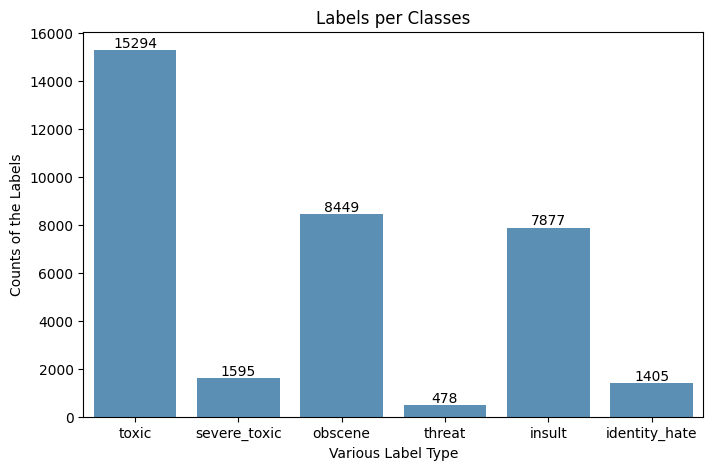

In [ ]:
import seaborn as sns
labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
targets = data[labels].values
import matplotlib.pyplot as plt
val_counts = data[labels].sum()
plt.figure(figsize=(8,5))
ax = sns.barplot(x=val_counts.index, y=val_counts.values, alpha=0.8)
plt.title("Labels per Classes")
plt.xlabel("Various Label Type")
plt.ylabel("Counts of the Labels")
rects = ax.patches
labels = val_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+5, label, ha="center", va="bottom")
plt.show()

# Preprocess Data

In [ ]:
# !pip list

In [ ]:
from tensorflow.keras.layers import TextVectorization

Retrieve id and comment text from the dataframe

In [ ]:
X = data['comment_text']
y = data[data.columns[2:]].values

In [ ]:
# PVectorize the text
MAX_FEATURES = 200000 # number of words in the vocab
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

vectorizer.adapt(X.values)
vectorized_text = vectorizer(X.values)
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

## Create LSTM Sequential Model

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [ ]:
model = Sequential()
# Create the embedding layer
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer
model.add(Dense(6, activation='sigmoid'))

In [ ]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

## Training Code

### --- Donot run code after this cell upto Gradio UI section if you intend to run gradio demo ---

In [ ]:
history = model.fit(train, epochs=15, validation_data=val)

Epoch 1/15
6981/6981 [==============================] - 819s 116ms/step - loss: 0.0635 - val_loss: 0.0479
Epoch 2/15
6981/6981 [==============================] - 720s 103ms/step - loss: 0.0455 - val_loss: 0.0408
Epoch 3/15
6981/6981 [==============================] - 717s 103ms/step - loss: 0.0410 - val_loss: 0.0371
Epoch 4/15
6981/6981 [==============================] - 712s 102ms/step - loss: 0.0369 - val_loss: 0.0314
Epoch 5/15
6981/6981 [==============================] - 695s 100ms/step - loss: 0.0321 - val_loss: 0.0287
Epoch 6/15
2185/6981 [========>.....................] - ETA: 7:04 - loss: 0.0292

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

#Predictions

Convert the comment into a batch input for the model to predict

In [ ]:
input_text = vectorizer("How big is... Fuck! Fuck! Fuck! Sam goes! Hey, don't say that word! Can you say I'm gonna go bear fun! Bo-sit, bo-sit! Can you say bear foot really slow? Bo-sit! Wait, terrible, Karen. Hey, how's... What? How's... Ah! Who lives in that castle? You get tired? Yeah. You like pop-up? Yeah. You like mommy? No. You didn't have to say any other word but no? Shit. Oh shit. Oh no! What? Oh no! Bo-sit! What did you say? Two thumbs up or two thumbs up fingers? Tears! My butt! I didn't wait on the second to head. I don't think so. You wanna come say how do you brother? So cute. You're funny.")

In [ ]:
res = model.predict(np.expand_dims(input_text, 0))
result = (res > 0.5).astype(int)
result

1/1 [==============================] - 0s 81ms/step


array([[1, 0, 1, 0, 1, 0]])

In [ ]:
# batch_X, batch_y = test.as_numpy_iterator().next()

In [ ]:
# (model.predict(batch_X) > 0.5).astype(int)

In [ ]:
# res.shape

In [ ]:
# Find the indices of the labels where the value is 1
indices = np.where(result == 1)
indices[1]

array([0, 2, 4])

Explain the probabilities returned by the model by mapping to the labels

In [ ]:
labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
print('The comment is classified as')
for label_index in np.nditer(indices[1]):
  print(labels[label_index])


The comment is classified as
toxic
obscene
insult


Save the model

In [ ]:
model.save('toxicity.h5')

#Model Evaluation

Precision and Recall of the trained model

In [ ]:

from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    # Unpack the batch
    X_true, y_true = batch
    # Make a prediction
    yhat = model.predict(X_true)

    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()

    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 53ms/step


In [ ]:

print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.8525963425636292, Recall:0.7396105527877808, Accuracy:0.5005015134811401


#Gradio UI

##Install libraries for Gradio UI configuration

In [ ]:
# !pip install gradio==2.9.4 jinja2
# !pip install typing-extensions --upgrade
!pip install fastapi==0.104.1 typing_extensions==4.8.0 gradio==3.41.0
# !pip install --upgrade fastapi pydantic


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.9 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=5584 sha256=eca1e42ed4b3ab4b74829b4465f3620f7b331604b926aa59ddc60b82960466f6
 

In [ ]:
# !pip show typing-extensions
# !pip show tensorflow

In [ ]:
import tensorflow as tf
import gradio as gr

Load the saved model to predict offensive content in video uploaded on Gradio UI

In [ ]:
model = tf.keras.models.load_model('toxicity.h5')

Predict the offensive content in the video as percentage of five offense categories alongwith "Not Offensice": "toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate", 'Not Offensive'

In [ ]:
import cv2
import pandas as pd



def score_comment(demo_video):
  # print(demo_video)
  offense_df = pd.DataFrame(columns=['Toxicity', 'Percent'])
  # if len(offense_df)!=0:
  #     # Make the DataFrame empty
  #     df = pd.DataFrame(columns=['Toxicity', 'Percent'])

  if demo_video==None:
    return offense_df

  print('Extracting audio from '+demo_video)

  # print(uploaded_video)
  extract_audio(demo_video, 'demo_audio.mp4')
  # comment = print('Transcription for audio '+audio_file)
  labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate", 'Not Offensive']
  class_colors = {'0':'red', '1':'pink', '2':'blue', '3':'orange', '4':'purple', '5': 'brown', '6': 'green'}
  sentence_colors = []
  offense_count = [0,0,0,0,0,0,0]
  offense_dict = {'Toxicity':[], 'Percent':[]}

  whisper_model = whisper.load_model("base")
  print("Performing Transcription")
  result = whisper_model.transcribe(os.path.join('/content', 'demo_audio.wav'), fp16=False, language='English')
  # print(result['text'])
  comments_lst = [text for text in result["text"].split('. ')]
  # print(comments_lst)
  total_comments = len(comments_lst)
  # print(total_comments)
  for comment in comments_lst:
    # print(comment)
    # comment="Please forgive me"
    vectorized_comment = vectorizer(comment)
    results = model.predict(np.expand_dims(vectorized_comment, 0))
    print(comment)
    print(results)
    # find the class with maximum confidence level
    class_with_max_confidence = np.argmax(results)
    sentence_colors.append(class_colors[str(class_with_max_confidence)])
    # print('original', results)
    results = (results > 0.5).astype(int)

    # print('result', results)
    # Find the indices of the labels where the value is 1
    indices = np.where(results == 1 )
    # print('Indices', indices)
    # print('Indices', indices[1])
    try:
      for label_index in np.nditer(indices[1]):
        offense_count[label_index]+=1

        # print(labels[label_index])
    except:
      # Handle the case where there is nothing offensive
      # incrementing the count of the non-offensive entry
      offense_count[-1]+=1
      # Not Offensive content so add pink as color
      sentence_colors[-1]= 'green'

  # print(offense_count)
  for index in range(len(labels)):
    offense_dict['Toxicity'].append(labels[index])
    offense_dict['Percent'].append((offense_count[index]/total_comments)*100)
    # offense_dict[labels[index]] = [(offense_count[index]/total_comments)*100]

  # print(offense_dict)
  # Convert dictionary to DataFrame
  # Convert dictionary to DataFrame
  new_df = pd.DataFrame(offense_dict)
  # Concatenate the new DataFrame with the existing DataFrame
  offense_df = pd.concat([offense_df, new_df], ignore_index=True)
  # offense_df = pd.DataFrame({'Toxicity': offense_dict.keys(),
  #                           'Percent': offense_dict.values()})

  print(offense_df)
  print(sentence_colors)
  # text = ''
  # for idx, col in enumerate(data.columns[2:]):
  #     text += '{}: {}\n'.format(col, results[0][idx]>0.5)
  return offense_df, result['text'], sentence_colors
  # return text

In [ ]:
# score_comment('/content/downloaded_video/Mom gives kids permission to say one swear word each she is SHOCKED by the results.mp4')

Make a demo_url folder to store all the youtube videos extracted according to the URL given by the user through Gradio UI

In [ ]:
import os

folder_name = "demo_url_video"

if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    print(f"Folder '{folder_name}' created.")
else:
    print(f"Folder '{folder_name}' already exists.")


Folder 'demo_url_video' created.


Gradio UI configuration

In [ ]:
import gradio as gr

HTML_labels= ['Colored Text', 'Toxicity Key']

def display_key():
  key = """
  <div>
      <h2>Toxicity Key</h2>
      <span style='color:red; font-weight:bold;'>toxic</span><br>
      <span style='color:pink; font-weight:bold;'>severe_toxic</span><br>
      <span style='color:blue; font-weight:bold;'>obscene</span><br>
      <span style='color:orange; font-weight:bold;'>threat</span><br>
      <span style='color:purple; font-weight:bold;'>insult</span><br>
      <span style='color:brown; font-weight:bold;'>identity_hate</span><br>
      <span style='color:green; font-weight:bold;'>Not Offensive</span><br>
  </div>
  """
  return key

def colorize_text(text, sentence_colors):
  colored_text = "<h2>Video Transcription</h2> \n"
  sentences = text.split(". ")
  for idx, sentence in enumerate(sentences):
      if sentence.strip():
          color_key = sentence_colors[idx]
          colored_text += f"<span style='color:{color_key};'>{sentence.strip()}.</span><br>"
  return colored_text

# labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate", 'Not Offensive']
# class_colors = {'0':'red', '1':'green', '2':'blue', '3':'yellow', '4':'purple', '5': 'brown', '6': 'pink'}

# Define your prediction function
def predict(input_video, youtube_url):
    # Your prediction logic here
    if input_video is not None:
        # prediction = f"Prediction for {input_video.name}"
        df, video_text, sentence_colors = score_comment(input_video)
    elif youtube_url:
      # Download video from the URL to demo_url_video folder
      download_video(youtube_url, output_path='demo_url_video')
      df, video_text, sentence_colors = score_comment(os.path.join('/content', 'demo_url_video', os.listdir(os.path.join('/content', 'demo_url_video'))[-1]))
      if os.path.exists(os.path.join('/content', 'demo_url_video', os.listdir(os.path.join('/content', 'demo_url_video'))[-1])):
        os.remove(os.path.join('/content', 'demo_url_video', os.listdir(os.path.join('/content', 'demo_url_video'))[-1]))
    else:
        prediction = "No video uploaded."

    # Return prediction and data for bar plot
    return df, colorize_text(video_text, sentence_colors), display_key()



# Continuously run the Gradio interface
while True:
    # Create the Gradio interface
    iface = gr.Interface(
        fn=predict,
        inputs=[gr.inputs.Video(label="Upload a video"),
                gr.inputs.Textbox(lines=3, label="Youtube URLs")],
        outputs=[gr.BarPlot(
              x='Toxicity',
              y='Percent',
              title="Offensive Content ",
              y_title="Offensive Content Type",
              x_title="Percentage of Offensive Content",
              vertical=True,
              tooltip=['Toxicity', 'Percent'],
              height=300,
              width=300
          ),gr.outputs.HTML(label=HTML_labels[0]), gr.outputs.HTML()], # gr.Textbox(label="Video Transcription")],
        title="Offensive Content Prediction",
        description="Upload a video to analyze offensive content within a video."
    )

    # Launch the interface
    iface.launch(share=True, debug=True)


  inputs=[gr.inputs.Video(label="Upload a video"),

  inputs=[gr.inputs.Video(label="Upload a video"),

  gr.inputs.Textbox(lines=3, label="Youtube URLs")],

  gr.inputs.Textbox(lines=3, label="Youtube URLs")],

  gr.inputs.Textbox(lines=3, label="Youtube URLs")],



Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://180cef08b059076034.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Video downloaded successfully to: demo_url_video
Extracting audio from /content/demo_url_video/Toddlers With Potty Mouths.mp4
MoviePy - Writing audio in demo_audio.wav


MoviePy - Done.
Audio extracted successfully to: demo_audio.wav
Performing Transcription
1/1 [==============================] - 0s 74ms/step
 How big is..
[[2.3755513e-03 2.4622147e-09 1.7027996e-05 5.2504461e-06 1.0306732e-04
  1.9808833e-05]]
1/1 [==============================] - 0s 75ms/step
Fuck! Fuck! Fuck! Sam goes! Hey, don't say that word! Can you say I'm gonna go bear fun! Bo-sit, bo-sit! Can you say bear foot really slow? Bo-sit! Wait, terrible, Karen
[[0.9997739  0.5421757  0.9941326  0.05381348 0.9526175  0.1835296 ]]
1/1 [==============================] - 0s 73ms/step
Hey, how's..
[[3.4475699e-03 8.9276639e-09 3.5202229e-05 1.2680136e-05 2.0241701e-04
  5.2093110e-05]]
1/1 [==============================] - 0s 75ms/step
What? How's..
[[3.2980638e-04 6.1276565e-12 6.7062467e-07 1.2215553e-07 5.7597131e-06
  6.9317542e-07]]
1/1 [==============================] - 0s 76ms/step
Ah! Who lives in that castle? You get tired? Yeah
[[2.3190286e-02 1.5753379e-06 6.8268593e-04 3.5651

MoviePy - Done.
Audio extracted successfully to: demo_audio.wav
Performing Transcription
1/1 [==============================] - 0s 47ms/step
 How big is..
[[2.3755513e-03 2.4622147e-09 1.7027996e-05 5.2504461e-06 1.0306732e-04
  1.9808833e-05]]
1/1 [==============================] - 0s 45ms/step
Fuck! Fuck! Fuck! Sam goes! Hey, don't say that word! Can you say I'm gonna go bear fun! Bo-sit, bo-sit! Can you say bear foot really slow? Bo-sit! Wait, terrible, Karen
[[0.9997739  0.5421757  0.9941326  0.05381348 0.9526175  0.1835296 ]]
1/1 [==============================] - 0s 45ms/step
Hey, how's..
[[3.4475699e-03 8.9276639e-09 3.5202229e-05 1.2680136e-05 2.0241701e-04
  5.2093110e-05]]
1/1 [==============================] - 0s 47ms/step
What? How's..
[[3.2980638e-04 6.1276565e-12 6.7062467e-07 1.2215553e-07 5.7597131e-06
  6.9317542e-07]]
1/1 [==============================] - 0s 47ms/step
Ah! Who lives in that castle? You get tired? Yeah
[[2.3190286e-02 1.5753379e-06 6.8268593e-04 3.5651

MoviePy - Done.
Audio extracted successfully to: demo_audio.wav
Performing Transcription
1/1 [==============================] - 0s 46ms/step
 Alright guys, we're gonna give you one time only to say whatever swear word you want without getting any trouble
[[7.0731282e-02 1.7744946e-05 2.6172178e-03 1.3012127e-03 9.9684624e-03
  3.5789027e-03]]
1/1 [==============================] - 0s 45ms/step
Now this is the only time I'm gonna ever let you do it without you getting in trouble and only one word, right? She better not be
[[1.11178525e-01 3.84036648e-05 4.02382715e-03 1.99309201e-03
  1.49512207e-02 4.77808760e-03]]
1/1 [==============================] - 0s 52ms/step
She don't
[[1.6596239e-03 8.1260604e-10 9.3590188e-06 2.4364297e-06 5.8185189e-05
  9.4924671e-06]]
1/1 [==============================] - 0s 47ms/step
She knew about us
[[7.9965638e-04 9.8606241e-11 2.9578505e-06 8.1339590e-07 2.4099072e-05
  4.4475128e-06]]
1/1 [==============================] - 0s 45ms/step
I'm a pretty 

MoviePy - Done.
Audio extracted successfully to: demo_audio.wav
Performing Transcription
1/1 [==============================] - 0s 71ms/step
 Good afternoon, Karen's good afternoon, boys and girls
[[9.98260453e-03 1.73811657e-07 2.11782331e-04 1.08510576e-04
  1.16826815e-03 5.08453057e-04]]
1/1 [==============================] - 0s 78ms/step
Shut the fuck up
[[0.9948384  0.21394856 0.9831019  0.00495353 0.6146691  0.01598282]]
1/1 [==============================] - 0s 69ms/step
Hey, hey
[[2.6515681e-02 3.5061969e-06 1.0300826e-03 3.3019992e-04 2.8621950e-03
  7.1393856e-04]]
1/1 [==============================] - 0s 72ms/step
Not nice
[[4.28075611e-04 1.09519355e-11 1.09839993e-06 1.55680652e-07
  7.30945885e-06 7.17641456e-07]]
1/1 [==============================] - 0s 70ms/step
No thank you
[[1.18703385e-04 2.63688892e-13 1.37733764e-07 1.70995698e-08
  1.32008995e-06 1.26749029e-07]]
1/1 [==============================] - 0s 69ms/step
No thank you
[[1.18703385e-04 2.63688892e-13 1.

MoviePy - Done.
Audio extracted successfully to: demo_audio.wav
Performing Transcription
1/1 [==============================] - 0s 46ms/step
 Hot food
[[8.4628857e-04 1.2837839e-10 3.5388932e-06 1.0097611e-06 2.8179953e-05
  5.9467629e-06]]
1/1 [==============================] - 0s 45ms/step
We sit out to eat and the potatoes are a bit hot
[[0.25982463 0.00047172 0.01635871 0.00808615 0.04783011 0.01555122]]
1/1 [==============================] - 0s 45ms/step
So I only put a little bit on my fork and I blow until it's cool, just cool, then into the mouth
[[0.47985795 0.00114423 0.02853248 0.01180432 0.08650514 0.02368465]]
1/1 [==============================] - 0s 53ms/step
Nice
[[4.4497426e-04 1.3844069e-11 1.1465162e-06 1.9136907e-07 8.4693565e-06
  9.5644407e-07]]
1/1 [==============================] - 0s 53ms/step
And there's my brother he's doing the same until it's cool, just cool, into the mouth
[[5.2136470e-02 8.4038638e-06 1.7227976e-03 8.8337623e-04 7.0551345e-03
  2.6387989e